In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import scipy.stats as stats

2.Load And Prepare Data


In [89]:
df=pd.read_csv('porter_data_1.csv')
#df.head()

In [90]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

In [91]:
#df.info()

In [92]:
df['order_hour'] = df['created_at'].dt.hour
df['order_dayofweek'] = df['created_at'].dt.dayofweek
df['is_weekend'] = df['order_dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

In [93]:
#df.head(20)

In [73]:
categorical_features = ['market_id', 'store_primary_category', 'order_protocol']
df[categorical_features] = df[categorical_features].astype('category')

In [74]:
df.drop(['created_at', 'actual_delivery_time'], axis=1, inplace=True)

3. Define feature:


In [75]:
y=df['time_taken']
x=df.drop(['time_taken'], axis=1)


In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#print(x_train)
print(y_train)
print(x_train.columns.tolist())

102712    45.0
94576     43.0
49784     46.0
37753     51.0
91728     37.0
          ... 
119879    43.0
103694    44.0
131932    40.0
146867    50.0
121958    33.0
Name: time_taken, Length: 140621, dtype: float64
['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'order_dayofweek', 'is_weekend']


In [99]:
columns_to_drop = ['min_item_price', 'num_distinct_items']
x_train = x_train.drop(columns=[col for col in columns_to_drop if col in x_train.columns])
x_test = x_test.drop(columns=[col for col in columns_to_drop if col in x_test.columns])



In [101]:
for col in columns_to_drop:
    if col not in x_train.columns:
        print(f"Column missing: {col}")

Column missing: min_item_price
Column missing: num_distinct_items


In [104]:
numeric_cols = [col for col in x_train.select_dtypes(include='number').columns if col != 'time_taken']
scaler = StandardScaler()
x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])

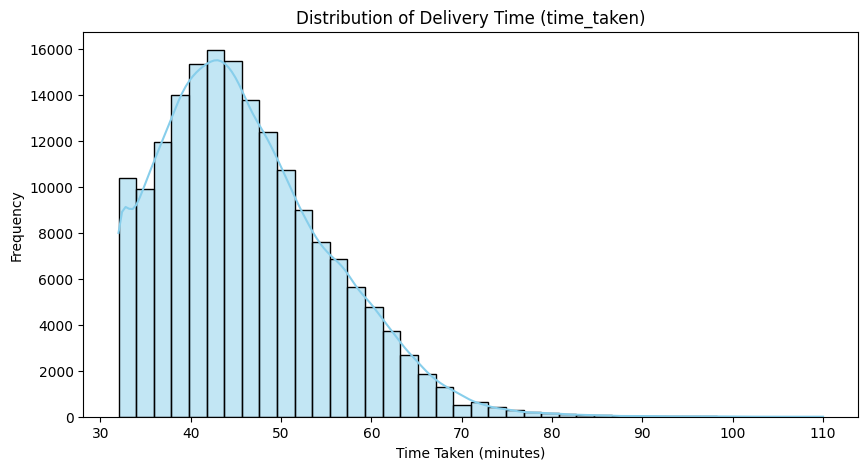

In [109]:
plt.figure(figsize=(10, 5))
sns.histplot(df['time_taken'], kde=True, bins=40, color='skyblue')
plt.title("Distribution of Delivery Time (time_taken)")
plt.xlabel("Time Taken (minutes)")
plt.ylabel("Frequency")
plt.show()

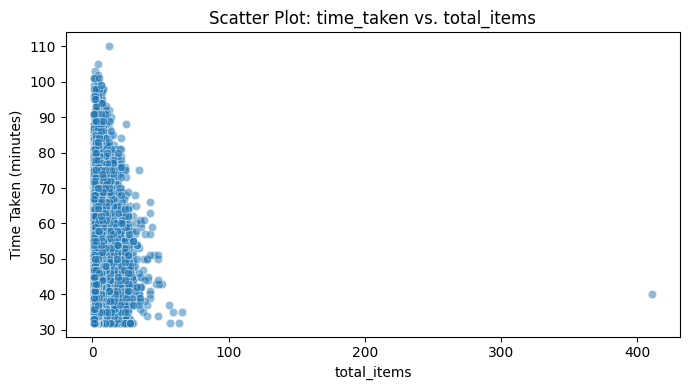

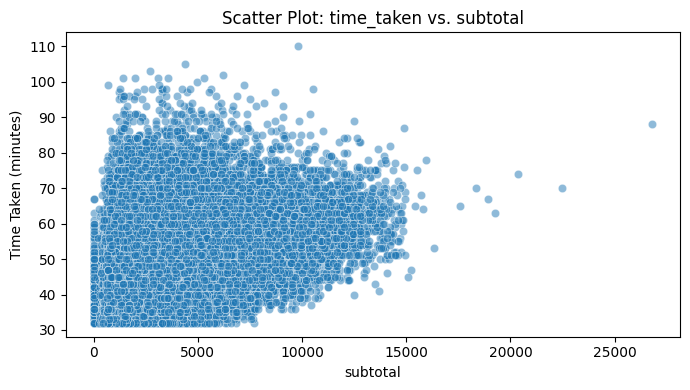

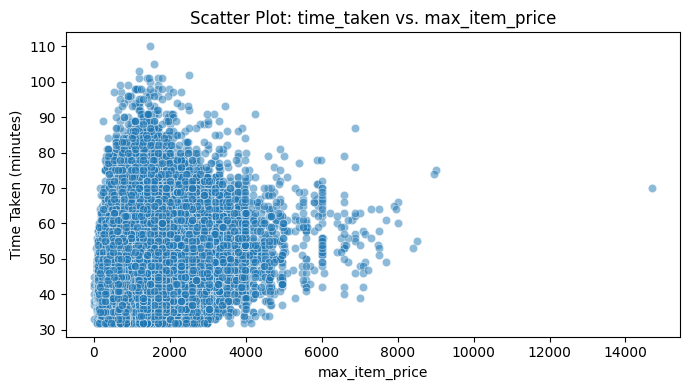

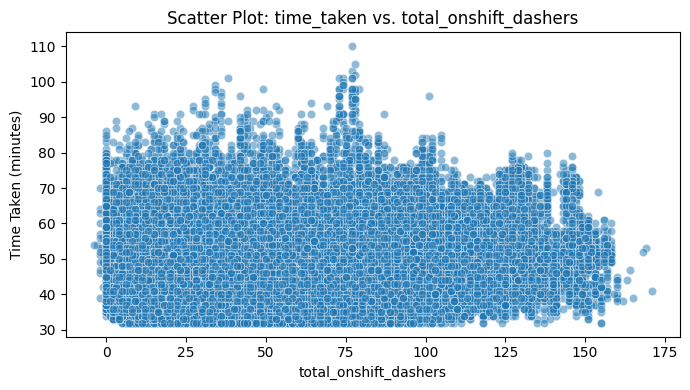

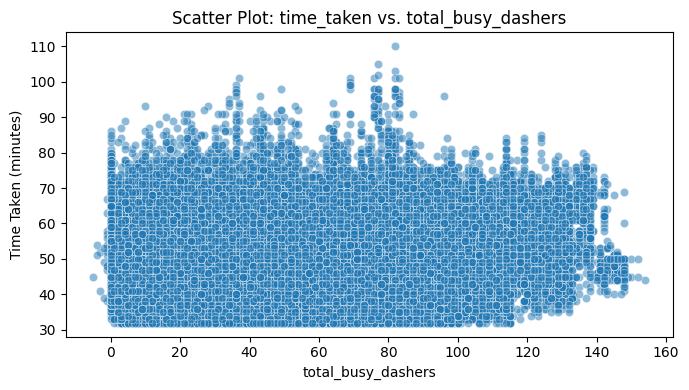

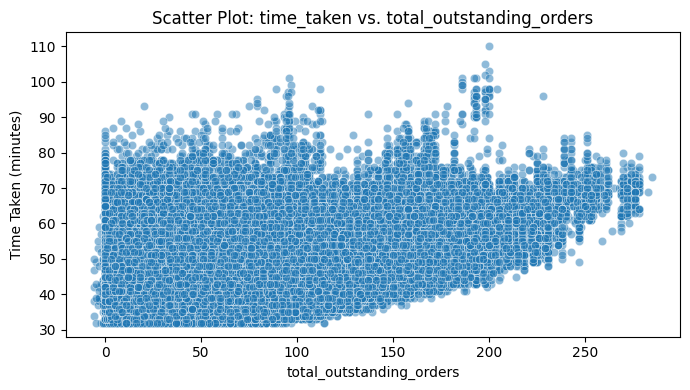

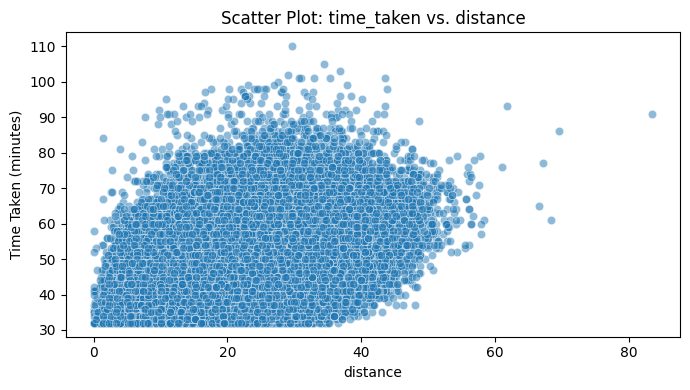

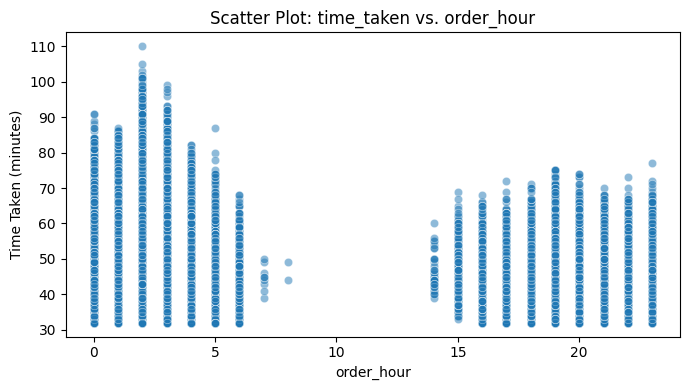

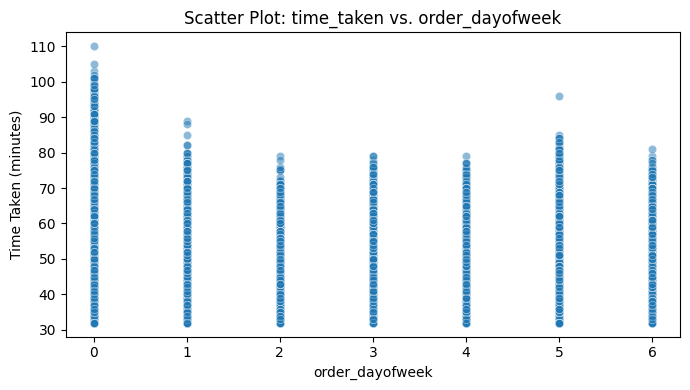

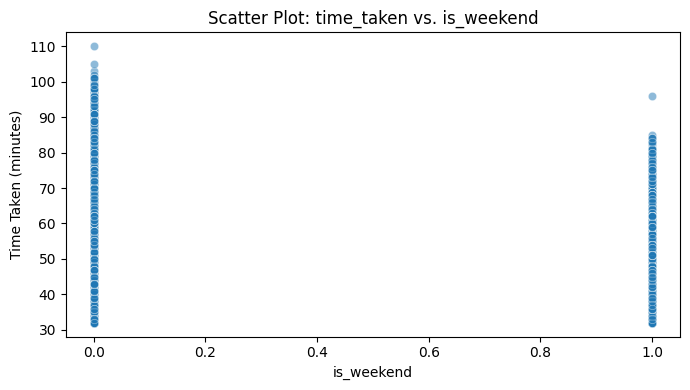

In [110]:

for col in numeric_cols:
    plt.figure(figsize=(7, 4))
    sns.scatterplot(data=df, x=col, y='time_taken', alpha=0.5)
    plt.title(f'Scatter Plot: time_taken vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Time Taken (minutes)')
    plt.tight_layout()
    plt.show()

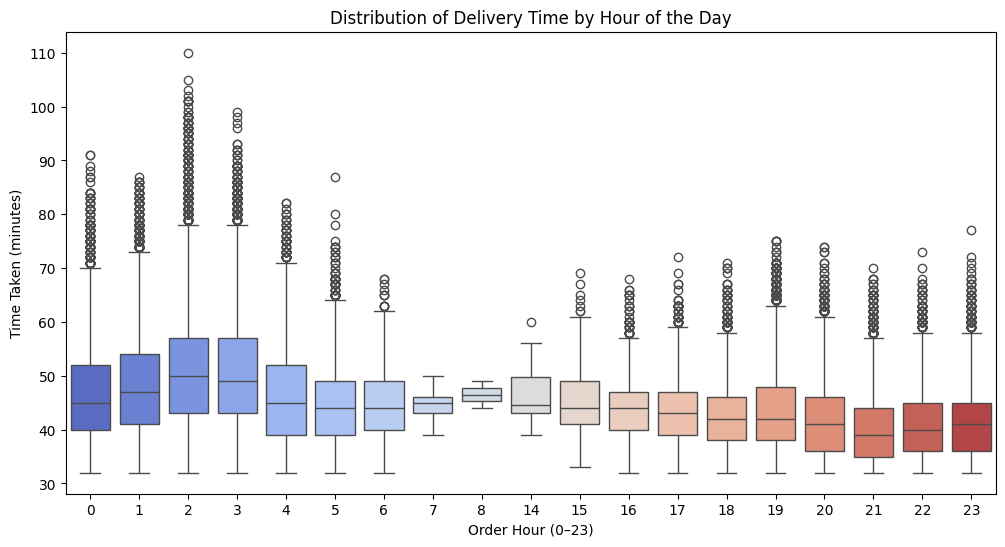

In [111]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='order_hour', y='time_taken', data=df, palette='coolwarm')
plt.title('Distribution of Delivery Time by Hour of the Day')
plt.xlabel('Order Hour (0–23)')
plt.ylabel('Time Taken (minutes)')
plt.show()

In [108]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)

Coefficients: [[ 1.00000000e+00  4.82992726e-17  5.01221649e-16  4.09654030e-17
   5.28659523e-17 -8.01188298e-18  1.08601471e-16  3.35528582e-18
   1.15518779e-17 -1.19492524e-17  1.98620215e-17  3.45609185e-16
   3.84139540e-16]
 [ 8.27678077e-17  1.00000000e+00  3.46944695e-18  1.82145965e-17
   2.60208521e-18  6.24500451e-17 -1.38777878e-16 -4.16333634e-17
   0.00000000e+00 -1.73472348e-17 -6.76542156e-17 -3.90312782e-18
   2.08166817e-17]
 [ 7.52467959e-16 -1.45716772e-16  1.00000000e+00  3.76143615e-16
  -3.41340725e-16 -3.05772118e-16 -3.46944695e-17  9.64939934e-17
  -8.00141203e-17 -3.68628739e-18  2.24484060e-16  4.41338047e-17
   1.00776592e-16]
 [-5.18346022e-17 -9.19403442e-17 -3.77844457e-17  2.72712379e+00
   1.75709531e-15 -9.48873413e-16  2.16471806e-15 -2.02908437e-15
   1.08420217e-17  3.14987836e-16  9.20840010e-16  3.94754623e-16
  -3.24281482e-16]
 [ 3.49115580e-13 -9.50350909e-14  3.09766102e-13  1.16842473e-12
   1.83080188e+03  1.01803635e-12 -3.51940699e-13 -3

In [112]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 0.00
R² Score: 1.00
